In [3]:
from stellargraph.data import EdgeSplitter
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
import stellargraph as sg
import matplotlib.pyplot as plt
import networkx as nx
import common_functions as cf
import random

In [4]:
G, mapper, reverse_mapper = cf.create_mapping_from_file_path('facebook/0.edges')

edge_splitter = EdgeSplitter(G)
splitted_graph, X, y = edge_splitter.train_test_split(p=0.2, method="global")

** Sampled 503 positive and 503 negative edges. **


# Baseline recommender
This rule-based algorithm finds the top 5 common friends of each node's friends. We will use this metric to recommend the top 5 most frequent friends. If there's not enough to recommend, we randomly select nodes.

In [23]:
import random
import stellargraph as sg
from collections import Counter

def top_common_neighbors(graph):
    # Get all node ids in the graph
    all_node_ids = list(graph.nodes())

    # Initialize an empty dictionary to store the results
    result = {}

    # Iterate over each node in the graph
    for node in all_node_ids:
        # Get the neighbors of the node
        neighbors = list(graph.neighbors(node))

        # Count the number of common neighbors for each neighbor
        common_neighbors_counts = Counter([
            neighbor for n in neighbors for neighbor in graph.neighbors(n) if neighbor != node
        ])

        # Get the top 5 nodes with the most common neighbors
        top_5 = [node_id for node_id, count in common_neighbors_counts.most_common(5)]

        # If the node has less than 5 neighbors, fill the remaining spots with random node ids
        while len(top_5) < 5:
            random_node = random.choice(all_node_ids)
            if random_node != node and random_node not in top_5:
                top_5.append(random_node)

        # Add the result to the dictionary
        result[node] = top_5

    return result

In [24]:
neighbor_dict = top_common_neighbors(splitted_graph)

In [25]:
neighbor_dict

{0: [34, 60, 1, 14, 107],
 56: [34, 14, 1, 7, 15],
 1: [60, 3, 34, 29, 7],
 22: [34, 60, 15, 3, 63],
 2: [144, 80, 116, 219, 183],
 80: [116, 183, 219, 214, 144],
 3: [34, 36, 7, 60, 65],
 115: [60, 7, 34, 29, 3],
 4: [3, 135, 86, 65, 103],
 107: [3, 34, 36, 15, 60],
 5: [32, 34, 0, 88, 15],
 131: [110, 20, 1, 115, 7],
 6: [80, 219, 144, 116, 167],
 47: [115, 15, 63, 3, 110],
 7: [69, 3, 34, 60, 14],
 84: [60, 3, 14, 34, 63],
 8: [35, 14, 69, 3, 89],
 223: [3, 30, 60, 34, 65],
 9: [14, 120, 36, 115, 3],
 36: [3, 60, 14, 34, 29],
 10: [107, 3, 34, 1, 109],
 95: [15, 60, 3, 29, 109],
 11: [7, 69, 3, 65, 34],
 31: [3, 34, 14, 69, 36],
 12: [60, 1, 3, 7, 29],
 13: [74, 3, 115, 1, 29],
 45: [3, 69, 14, 115, 109],
 14: [34, 3, 7, 36, 69],
 78: [3, 34, 14, 36, 60],
 15: [3, 34, 60, 29, 63],
 32: [88, 119, 178, 50, 116],
 16: [135, 3, 23, 1, 29],
 18: [3, 34, 60, 14, 29],
 17: [230, 179, 200, 217, 238],
 188: [179, 230, 241, 238, 217],
 34: [3, 60, 14, 7, 36],
 19: [116, 80, 119, 219, 144],
 1

In [7]:
predictions = []
for (x1, x2), y_ in zip(X,y):
    if y_ == 1:
        if x1 in neighbor_dict[x2] or x2 in neighbor_dict[x1]:
            predictions.append(1)
        else:
            predictions.append(0)
    else:
        if x1 in neighbor_dict[x2] or x2 in neighbor_dict[x1]:
            predictions.append(0)
        else:
            predictions.append(1)
            
    

In [8]:
predictions = np.array(predictions)

# Evaluation

In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, predictions)

In [10]:
accuracy

0.18290258449304175

In [11]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y, predictions)

In [12]:
cm

array([[ 11, 492],
       [330, 173]])

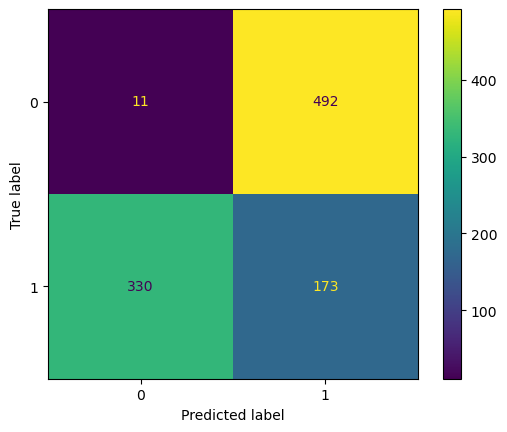

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y, predictions)

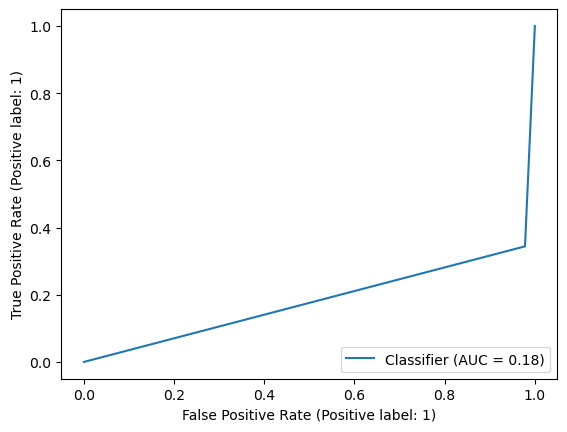

In [17]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y, predictions)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.03      0.02      0.03       503
           1       0.26      0.34      0.30       503

    accuracy                           0.18      1006
   macro avg       0.15      0.18      0.16      1006
weighted avg       0.15      0.18      0.16      1006
